In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
titles_df = pd.read_csv('/content/titles.csv')
credits_df = pd.read_csv('/content/credits.csv')

# Merge the relevant columns
merged_df = pd.merge(titles_df, credits_df, on='id')


In [2]:
# Preprocess the data
merged_df.drop_duplicates(subset='id', inplace=True)
merged_df.dropna(subset=['description'], inplace=True)
merged_df = merged_df[['title', 'description']]


In [3]:
# Feature extraction
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_df['description'])


In [32]:
# Similarity computation
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_recommendations(title, cosine_sim, df, n=10, plot_recommendations=False):
    title_indices = df[df['title'] == title].index
    if len(title_indices) == 0:
        return None  # or custom error message
    idx = title_indices[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]
    movie_indices = [i[0] for i in sim_scores]
    recommended_titles = df['title'].iloc[movie_indices]
    similarity_scores = [i[1] for i in sim_scores]
    
    if plot_recommendations:
        # create a bar plot of the recommended titles
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=similarity_scores, y=recommended_titles, palette='viridis')
        ax.set_xlabel('Similarity Score', fontsize=14)
        ax.set_ylabel('Title', fontsize=14)
        ax.set_title(f'Recommended Titles for {title}', fontsize=16)
        plt.show()

    return recommended_titles



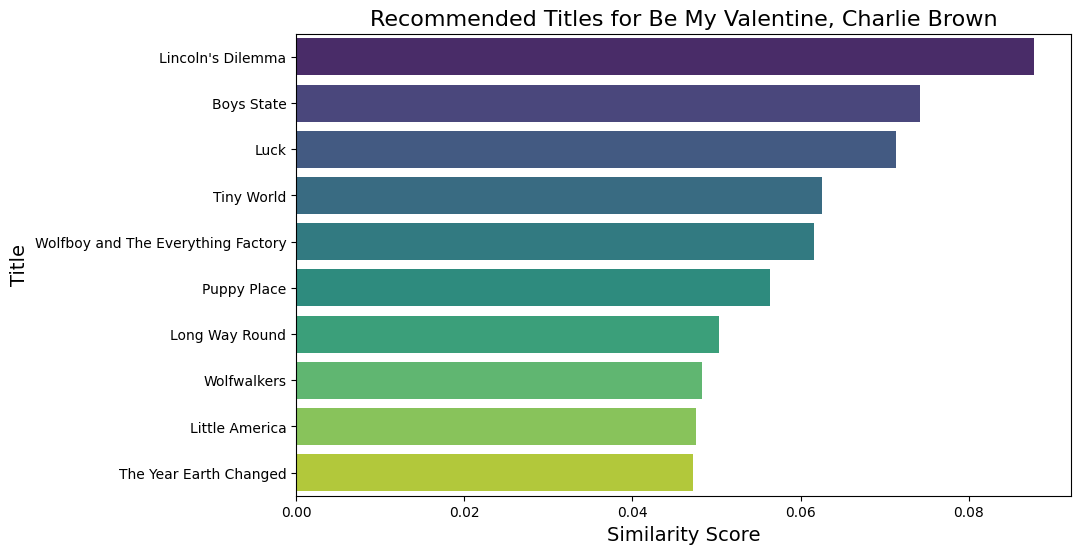

In [54]:
# Example usage
recommended_titles = get_recommendations('Be My Valentine, Charlie Brown', cosine_sim, merged_df, plot_recommendations=True)